# Homework

Mini Batch Training

In AI, datasets are often very large and cannot be processed all at once as is done in the loop above. The data is instead randomly sampled in smaller batches where each batch contains batch_size inputs. How can you change the loop above to sample the dataset in smaller batches? Hint: Our data variable is a Pandas DataFrame object, search for "how to sample a DataFrame".

Instead of using the entire dataset like

data_x = data['GrLivArea'].to_numpy()
data_y = data['SalePrice'].to_numpy()
Use

data_batch = data.sample(batch_size)
data_x = data_batch['GrLivArea'].to_numpy()
data_y = data_batch['SalePrice'].to_numpy()
You also have to adjust the loop_N accordingly to make sure that it loop over the entire datasets the same number of times.

loop_N = 30*len(data)//batch_size
Please plot your learning curve for different batch size, such as 32, 64, 128, 256, 512.

# Sol

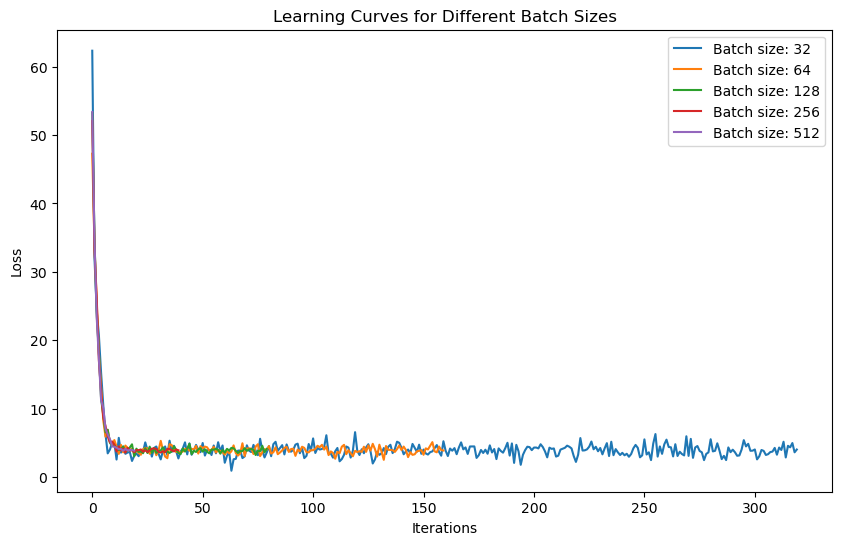

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)
n_samples = 1000
X = 2 * np.random.rand(n_samples, 1)
y = 4 + 3 * X + np.random.randn(n_samples, 1)
data = pd.DataFrame({'GrLivArea': X.flatten(), 'SalePrice': y.flatten()})

def mini_batch_sgd(data, batch_size, learning_rate_m, learning_rate_b, epochs=10):
    m, b = 0, 0
    n = len(data)
    loss_history = []

    for epoch in range(epochs):
        shuffled_data = data.sample(frac=1).reset_index(drop=True)
        
        for i in range(0, n, batch_size):
            data_batch = shuffled_data[i:i + batch_size]
            X_batch = data_batch['GrLivArea'].to_numpy().reshape(-1, 1)
            y_batch = data_batch['SalePrice'].to_numpy().reshape(-1, 1)
            y_pred = m * X_batch + b
            error = y_pred - y_batch
            gradient_m = 2 * np.mean(error * X_batch)
            gradient_b = 2 * np.mean(error)
            m -= learning_rate_m * gradient_m
            b -= learning_rate_b * gradient_b
            loss = np.mean(error ** 2)
            loss_history.append(loss)
    
    return m, b, loss_history
def plot_learning_curves(data, batch_sizes, learning_rate_m, learning_rate_b, epochs=10):
    plt.figure(figsize=(10, 6))
    
    for batch_size in batch_sizes:
        _, _, loss_history = mini_batch_sgd(data, batch_size, learning_rate_m, learning_rate_b, epochs)
        plt.plot(loss_history, label=f'Batch size: {batch_size}')
    
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Learning Curves for Different Batch Sizes')
    plt.legend()
    plt.show()
batch_sizes = [32, 64, 128, 256, 512]
learning_rate_m = 1e-7
learning_rate_b = 1e-1
plot_learning_curves(data, batch_sizes, learning_rate_m, learning_rate_b)